<!-- <h1 style="background:yellow;">Ahmad Abdulla</h1> -->


## Clean Water Project Instructions
1.  Download CleanWaterDataSet.rar from the shared box and Unpack it.
2.  Upload the entire folder to your google drive.
3.  Click File > Save a Copy in Drive and work on your own saved notebook.
3.	Instructions for coding (What you need to code):
- Set DATA_PATH and FOLDER_PATH to your paths of CleanWaterDataset and CleanWaterProject, respectively. 
-  Define your training model in the section of Training. The network structure will affect the model’s accuracy. Try different structures of the network to improve the performance. Run the cell of Training Routine to train the model. Keep in mind that batch_size and epochs will also affect the prediction accuracy, and batch_size is also related to the size of the input image. Try to tune them as well. The trained model will be saved to cleanwaterai.h5. 
- Test you model: run the cell of Test to see how your model preform via visualizing 20 test images. 
- Print your notebook by clicking File > Save > PDF to upload your work. 

In [1]:
import random
import numpy as np
import os
import matplotlib.pyplot as plt

plt.style.use('ggplot')
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dropout, Dense
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adadelta

In [2]:
# Global Settings 
IMAGE_WIDTH = 50
IMAGE_HEIGHT = 50
TRAIN_SIZE = 770
TEST_SIZE = 1100 - 770
DATA_DIR = 'Q2 - Clean Water AI'
SAVE_DIR = 'CleanWaterProject'

In [3]:
# Load Data Methods 
def load_input(file):
    input_img = np.load(file)
    input_data = input_img.reshape((-1, IMAGE_HEIGHT, IMAGE_WIDTH, 1))
    input_data = input_data.astype('float32')
    input_data /= 255
    return input_img, input_data

def load_label(file):
    label = np.load(file)
    label_categ = to_categorical(label, 11)
    return label, label_categ

def load_train_data(folder):
    train_img, train_data = load_input(os.path.join(folder, 'train_input.npy'))
    train_label, train_label_categ = load_label(os.path.join(folder, 'train_label.npy'))
    return train_img, train_data, train_label, train_label_categ

def load_test_data(folder):
    test_img, test_data = load_input(os.path.join(folder,'test_input.npy'))
    test_label, test_label_categ = load_label(os.path.join(folder,'test_label.npy'))
    return test_img, test_data, test_label, test_label_categ

In [4]:
# Load Dataset
train_img, train_x, train_y_idx, train_y = load_train_data(DATA_DIR)
test_img, test_x, test_y_idx, test_y = load_test_data(DATA_DIR)

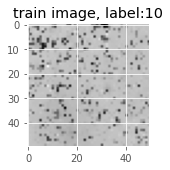

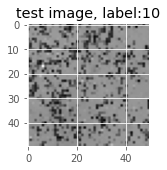

In [5]:
# Visualize Dataset
index = 0
plt.figure(figsize=(3, 2.25))
img = train_img[index, :, :].astype(int)
plt.imshow(img, cmap='gray')
plt.title('train image, label:{}'.format(int(train_y_idx[index])))
plt.show()
plt.figure(figsize=(3, 2.25))
img = test_img[index, :, :].astype(int)
plt.imshow(img, cmap='gray')
plt.title('test image, label:{}'.format(int(test_y_idx[index])))
plt.show()

In [6]:
# Define Model
model = Sequential()
model.add(Conv2D(128, (3, 3), input_shape=train_x.shape[1:], activation="relu"))
model.add(MaxPool2D(2,2))
model.add(Conv2D(64,(3,3), activation="relu"))
model.add(MaxPool2D(2,2))
model.add(Conv2D(32,(3,3), activation="relu"))
model.add(Flatten())
model.add(Dense(11))
model.add(tf.keras.layers.Activation('softmax'))

In [7]:
# Print Model Summary
print("Model Summary")
model.summary()

Model Summary
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 128)       1280      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 32)          18464     
                                                                 
 flatten (Flatten)           (None, 2592) 

In [8]:
# Compile Model
opt = tf.keras.optimizers.SGD(momentum=.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [9]:
# Train Model
print("Epochs = 1000 \nBatch Size = 512")
batch_size = 512
epochs = 1000

model.fit(train_x, train_y, batch_size=batch_size, epochs=epochs)

Epochs = 1000 
Batch Size = 512
Epoch 1/1000
2/2 [==============================] - 4s 888ms/step - loss: 2.4029 - accuracy: 0.0909
Epoch 2/1000
2/2 [==============================] - 3s 848ms/step - loss: 2.4018 - accuracy: 0.0909
Epoch 3/1000
2/2 [==============================] - 3s 891ms/step - loss: 2.3998 - accuracy: 0.0909
Epoch 4/1000
2/2 [==============================] - 3s 918ms/step - loss: 2.3985 - accuracy: 0.0909
Epoch 5/1000
2/2 [==============================] - 3s 878ms/step - loss: 2.3972 - accuracy: 0.0909
Epoch 6/1000
2/2 [==============================] - 3s 938ms/step - loss: 2.3962 - accuracy: 0.0909
Epoch 7/1000
2/2 [==============================] - 3s 913ms/step - loss: 2.3959 - accuracy: 0.0922
Epoch 8/1000
2/2 [==============================] - 3s 862ms/step - loss: 2.3955 - accuracy: 0.1065
Epoch 9/1000
2/2 [==============================] - 2s 863ms/step - loss: 2.3951 - accuracy: 0.0909
Epoch 10/1000
2/2 [==============================] - 3s 841ms/step -

In [10]:
# Save Model
model.save(os.path.join(SAVE_DIR,'cleanwatermodel.h5'))

In [11]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_x, test_y, verbose=2)
print('Test loss: {:.4f}'.format(test_loss))
print('Test accuracy: {:.4f}'.format(test_accuracy))

11/11 - 1s - loss: 0.2316 - accuracy: 0.9515 - 939ms/epoch - 85ms/step
Test loss: 0.2316
Test accuracy: 0.9515


1/1 [==============================] - 0s 266ms/step


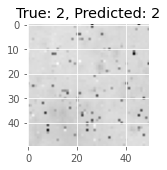

1/1 [==============================] - 0s 91ms/step


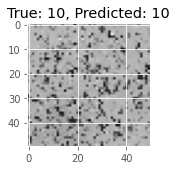

1/1 [==============================] - 0s 52ms/step


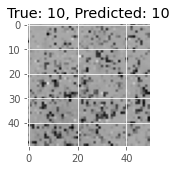

1/1 [==============================] - 0s 33ms/step


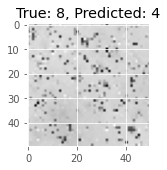

1/1 [==============================] - 0s 40ms/step


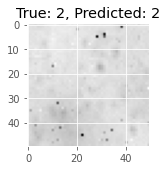

1/1 [==============================] - 0s 37ms/step


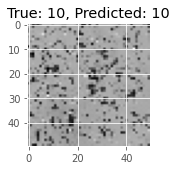

1/1 [==============================] - 0s 51ms/step


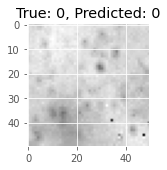

1/1 [==============================] - 0s 34ms/step


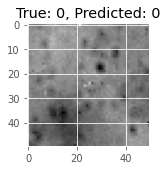

1/1 [==============================] - 0s 47ms/step


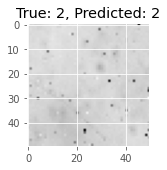

1/1 [==============================] - 0s 45ms/step


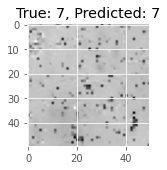

1/1 [==============================] - 0s 33ms/step


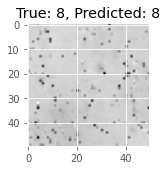

1/1 [==============================] - 0s 41ms/step


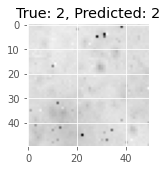

1/1 [==============================] - 0s 35ms/step


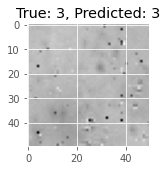

1/1 [==============================] - 0s 56ms/step


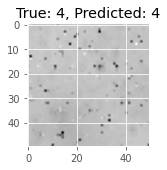

1/1 [==============================] - 0s 42ms/step


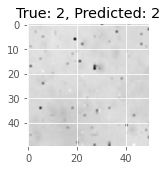

1/1 [==============================] - 0s 41ms/step


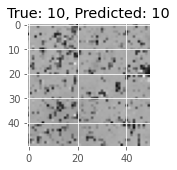

1/1 [==============================] - 0s 39ms/step


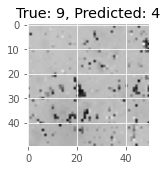

1/1 [==============================] - 0s 39ms/step


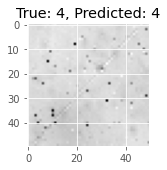

1/1 [==============================] - 0s 45ms/step


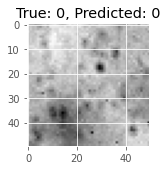

1/1 [==============================] - 0s 57ms/step


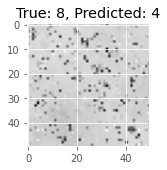

In [12]:
# Make predictions on 20 random samples from the test set
sample_indices = np.random.choice(len(test_x), 20)
for i in range(len(sample_indices)):
    index = sample_indices[i]
    pred_one_hot = model.predict(np.reshape(test_x[index, :, :, :], (1, IMAGE_HEIGHT, IMAGE_WIDTH, 1)))
    pred = np.argmax(pred_one_hot)
    plt.figure(figsize=(3, 2.25))
    img = test_img[index, :, :].astype(int)
    plt.imshow(img, cmap='gray')
    plt.title('True: {}, Predicted: {}'.format(int(test_y_idx[index]), pred))
    plt.show()